<a href="https://colab.research.google.com/github/Rakshana2002/Cognizance-Mentors-Task/blob/main/Wine_potability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()


Saving water_potability.csv to water_potability.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
 
data1=pd.read_csv("water_potability.csv")
print(data1)



            ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.88535

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


In [ ]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441374,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587067,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


In [ ]:
data.Potability.value_counts()*100/len(data)

0    59.671805
1    40.328195
Name: Potability, dtype: float64

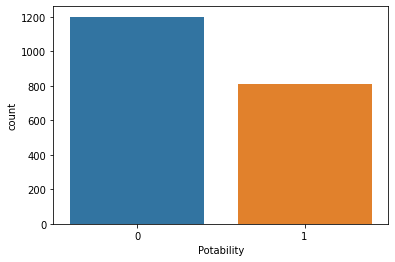

In [ ]:
# Visualizing Class imbalance in the target variable
sns.countplot(x='Potability', data=data);

In [ ]:
x = data.drop('Potability', axis=1)
y= data.Potability.values

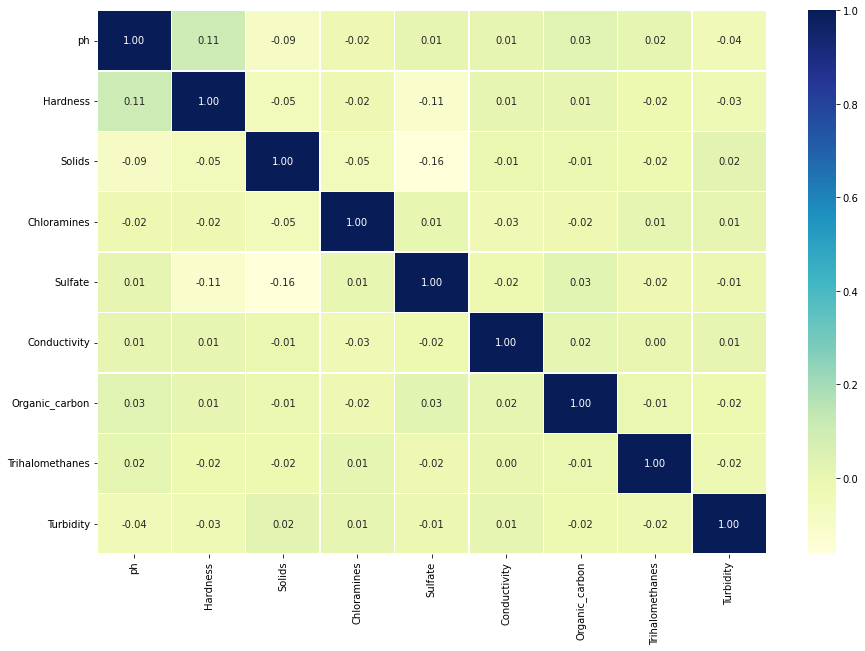

In [ ]:
fig, ax= plt.subplots(figsize=(15,10))
sns.heatmap(x.corr(), ax=ax, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(42)

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)
x_train.shape, y_train.shape, 

((1608, 9), (1608,))

In [ ]:
x_test.shape, y_test.shape


((403, 9), (403,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
models = {"Random forest": RandomForestClassifier()}
def fit_and_score(x_train, y_train, x_test, y_test):
  np.random.seed(42)
  model_scores = {}
  for name, model in models.items():
    model.fit(x_train, y_train)
    model_scores[name] = model.score(x_test, y_test)
  return model_scores

In [ ]:
model_scores = fit_and_score(x_train, y_train, x_test, y_test)
print(model_scores)

{'Random forest': 0.652605459057072}


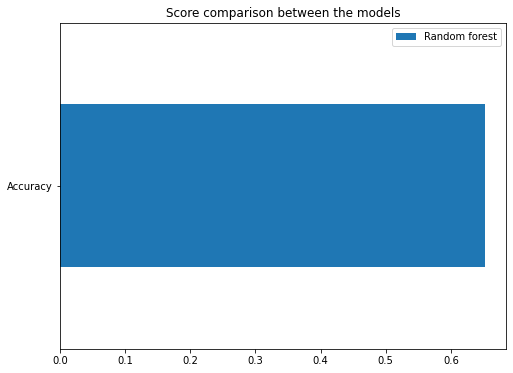

In [ ]:
model_compare = pd.DataFrame(model_scores, index= ['Accuracy'])
fig, ax = plt.subplots(figsize=(8,6))
model_compare.plot.barh(ax=ax)
plt.title('Score comparison between the models')
plt.xticks(rotation=0);

In [ ]:
rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth": [None, 3, 5, 7, 10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1, 25, 1)}
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv=5,
                           n_iter = 20,
                           verbose=True
                           )
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 7, 10],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
rs_rf.best_params_

{'n_estimators': 60,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': None}

In [ ]:
rs_rf_grid = {"max_depth": [None],
              "min_samples_leaf": [5,6,7],
              "min_samples_split": [15,16,17],
              "n_estimators": [960]}
gs_rf = GridSearchCV(RandomForestClassifier(),
                     param_grid = rs_rf_grid,
                     cv= 5, 
                     verbose=True)

gs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None], 'min_samples_leaf': [5, 6, 7],
                         'min_samples_split': [15, 16, 17],
                         'n_estimators': [960]},
             verbose=True)

In [ ]:
gs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 5,
 'min_samples_split': 16,
 'n_estimators': 960}

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


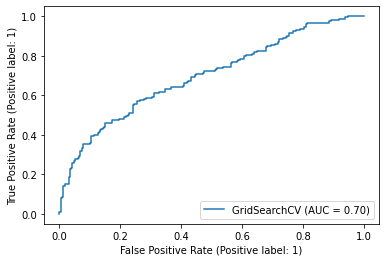

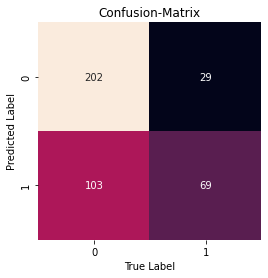

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
y_preds = gs_rf.predict(x_test)
plot_roc_curve(gs_rf, x_test, y_test);
fig,ax = plt.subplots(figsize=(4,4))
ax= sns.heatmap(confusion_matrix(y_test, y_preds),
                annot = True,
                cbar= False,
                fmt='g')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion-Matrix')
plt.show()

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.66      0.87      0.75       231
           1       0.70      0.40      0.51       172

    accuracy                           0.67       403
   macro avg       0.68      0.64      0.63       403
weighted avg       0.68      0.67      0.65       403

